In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
data = pd.read_csv('operations.csv')
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [3]:
data.shape

(309, 5)

In [5]:
data.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

In [7]:
# correction du type de la variable date_operation via la fonction to_datetime de pandas afin d'avoir un type date
data['date_operation'] = pd.to_datetime(data['date_operation'])
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

In [8]:
# On va ensuite vérifier si notre jeu de données contient des valeurs manquantes
data.isnull().sum()

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [9]:
# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = data.isnull().sum()
nb_na[nb_na>0]

montant    2
categ      1
dtype: int64

In [10]:
# notre jeu de données contient 3 valeurs manquantes. Regardons les plus en détails 
data.loc[data['montant'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [18]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]
print(data_na.index)
# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']
data.isnull().sum()

Int64Index([], dtype='int64')


date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             1
dtype: int64

In [19]:
# regardons la categorie manquante 
data.loc[data['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


In [20]:
# Par manque d'informations, on devrait supprimer ici la ligne correspondante. 
# Mais regardons si nous ne pouvons pas trouver la catégorie à partir des autres informations, notamment le libellé :
#afficher la column libelle dont le libelle est 'PRELEVEMENT XX TELEPHONE XX XX'
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [21]:
data.loc[data['categ'].isnull(), 'categ'] = 'FACTURE TELEPHONE'

In [24]:
#vérification
data.loc[data['categ'] == 'FACTURE TELEPHONE', :]
data.isnull().sum()

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64

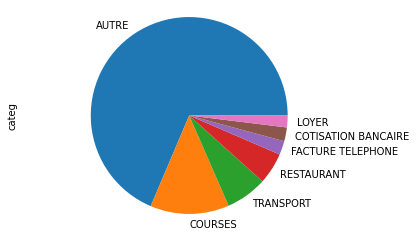

In [31]:
data["categ"].value_counts(normalize=False).plot(kind='pie')
plt.axis('equal') 
plt.show() 